# Advanced Machine Learning and Artificial Intelligence (MScA 32017)

# Project: Satellite Imagery Feature Detection

## Notebook 4: Project Instructions

### Yuri Balasanov, Mihail Tselishchev, &copy; iLykei 2018

##### Main text: Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurelien Geron, &copy; Aurelien Geron 2017, O'Reilly Media, Inc


## Objective

The objective for this project is to predict class masks for one test image located at `data/mband/test.tif`. 

It looks like:

In [1]:
%matplotlib inline

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f3ac13b4fd0>)

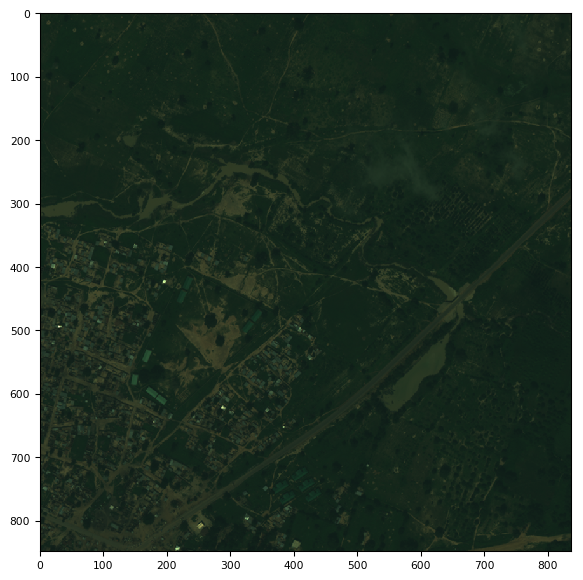

In [2]:
import tifffile as tiff
from matplotlib import pyplot as plt 
id = 'test'
img = tiff.imread('data/mband/{}.tif'.format(id))
tiff.imshow(img[(4,2,1),:,:])  # only RGB channels

Instead of simple *logloss* (also known as *binary crossentropy*) we use *weighted logloss* as loss function. <br>
It is defined as:

$$ wll = - 
\sum_{c=0}^{\text{n_classes}-1} \text{weight}[c] \ \frac{1}{hw}
\sum_{i,j=1}^{h,w} \biggl( y_{\text{true}}[c,i,j] \cdot \ln \left(y_\text{pred}[c,i,j]\right) + \left(1-y_{\text{true}}[c,i,j]\right) \cdot \ln \left(1 - y_\text{pred}[c,i,j]\right)\biggr) \ ,  $$

where $h$ and $w$ are height and width of original image,  $y_\text{pred}[c,i,j]$  are predicted probabilities of pixel $[i,j]$ belonging to class $c$, $y_{\text{true}}[c,i,j]$ is true indicator ($1$ or $0$) and $\text{weight}$ is a vector of class weights:

In [3]:
CLASS_WEIGHTS = [0.2, 0.3, 0.1, 0.1, 0.3]

Note that such weights make roads and water more important, while keeping trees and crops less important for the network.

## Some Recommendations

### Model

Most of the winners of the Kaggle original contest used U-Networks described in the corresponding notebook.

Implementation of deep U-Net is provided in `unet_model.py`.

In order to meet the project goal students are encouraged to experiment tweaking some parameters or even changing the architecture (for example, making the network deeper, or adding new layers such as batch normalization for preventing gradient exploding or vanishing, or dropout layer to reduce overfitting).

Check how many parameters the deep network has.

### Train Data Augmentation

You also might want to improve function `get_rand_patch()` from `gen_patches.py`. This function generates random patches from images. <br>
For instance, you can randomly rotate images before getting a patch. This process is called image augmentation. It can significantly increase train data and training quality.

### Test Data Augmentation

Similarly, you can improve `predict()` function from `predict.py`: predict rotated patches from test image and then average the result.

It is well-known that U-Net predicts better in the center of the patch and worse on patch borders. So, it makes sence to cut test image into overlapped patches to be sure that every region is predicted with some patch where it lies in the center.

### Network Ensembling

Finally, it may be possible to improve the results by training more than one neural network and average all predictions.

Example of training the network can be found in `train_unet.py`.

## Output Format and Other Instructions

Before uploading `tif`-file with class masks, make sure it has shape `(5, height, width)`, i.e. class dimension goes first.

You also need to multiply your probabilities by `255` and save your masks as `uint8` `tif`-file.

To fit the model on RCC GPU copy provided and modified directory *'code'* to the cluster, put the provided data directory inside the *'code'* directory and execute the provided sbatch by:

*'sbatch run.sbatch'*

The goal for the project is to achieve weighted logloss of 0.29 or better.